<a href="https://colab.research.google.com/github/dhanushpachabhatla/my-machine-learning-notes/blob/main/stochastic_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#stochastic GD

In [ ]:
from sklearn.datasets import load_diabetes

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import time

In [ ]:
X,y = load_diabetes(return_X_y=True)

In [ ]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(reg.coef_)
print(reg.intercept_)

[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
151.88331005254167


In [ ]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4399338661568968

* actual mathematical code

In [ ]:
class SGDRegressor:

    def __init__(self,learning_rate=0.01,epochs=100):

        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self,X_train,y_train):
        # init your coefs
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])

        for i in range(self.epochs):
            for j in range(X_train.shape[0]):
                idx = np.random.randint(0,X_train.shape[0])

                y_hat = np.dot(X_train[idx],self.coef_) + self.intercept_

                intercept_der = -2 * (y_train[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr * intercept_der)

                coef_der = -2 * np.dot((y_train[idx] - y_hat),X_train[idx])
                self.coef_ = self.coef_ - (self.lr * coef_der)

        print(self.intercept_,self.coef_)

    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

* here you can see that we update your coefficents and intercept for every row so now we can finish in less epochs and it can converge faster.
* but accuracy may be less than other gd methods
* random row for each inner loop

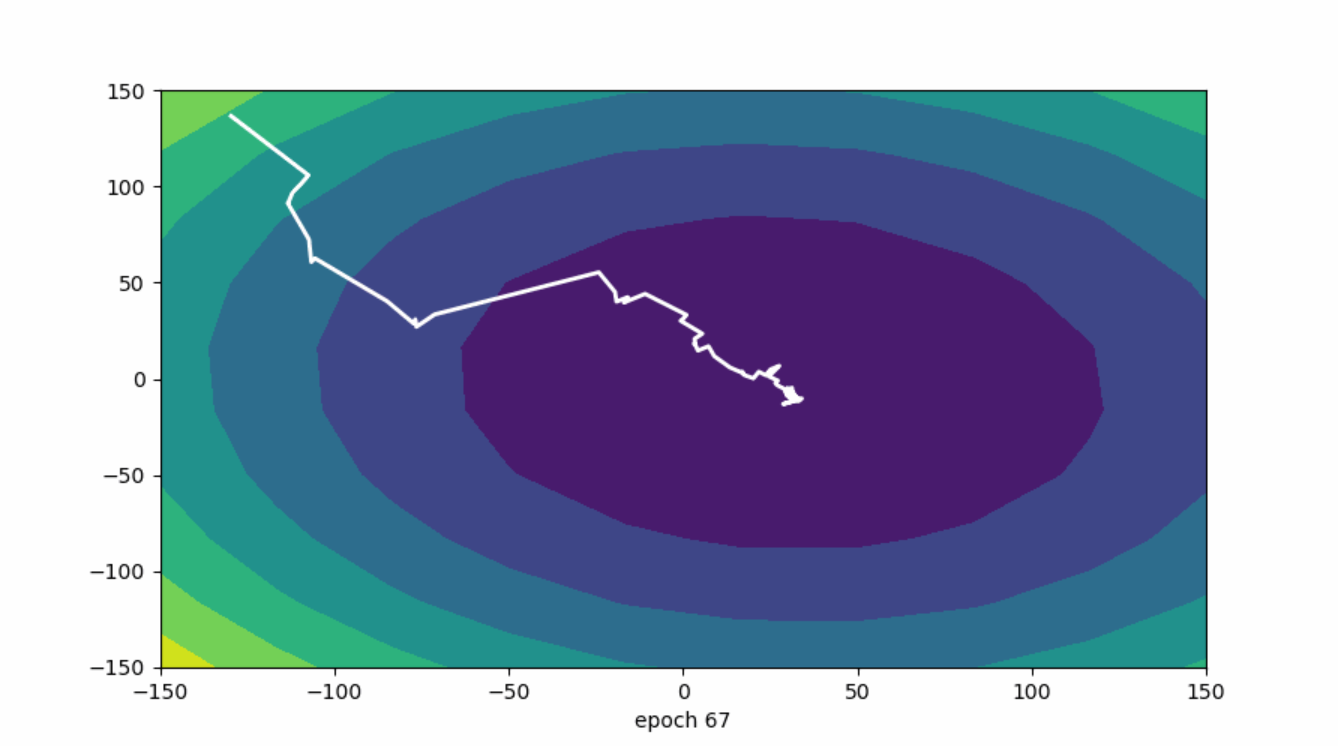

* as you can see here it is not uniform, is taking lot of random jumps due to random rows selection
* batch gd would be more like a line unlike this

In [ ]:
sgd = SGDRegressor(learning_rate=0.01,epochs=40)

In [ ]:
start = time.time()
sgd.fit(X_train,y_train)
print("The time taken is",time.time() - start)

163.3860878219235 [  58.90809618  -45.03697286  312.89313923  224.25984209   29.76720415
  -12.75115172 -158.23863797  126.91243465  298.06819671  115.89291253]
The time taken is 0.14112162590026855


In [ ]:
y_pred = sgd.predict(X_test)

In [ ]:
r2_score(y_test,y_pred)

0.3984528661166985

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
reg = SGDRegressor(max_iter=100,learning_rate='constant',eta0=0.01)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.43237358690578476